In [1]:
import numpy as np
import matplotlib.pyplot as plt
from CADMium import Pssolver, Psgrid, Partition, Inverter
import CADMium

from copy import copy

In [2]:
# dis_eq      = np.linspace(0.5,5,30)
# dis_st      = np.linspace(5.1,10,10)
# distances   = np.concatenate((dis_eq, dis_st))
#distances = [1.0,1.5,2.0,3.0,6.0,10]
distances = [2.0]
energy    = []

Za, Zb = 1,1
pol = 2
NP, NM = 7, [6,6]
loc = np.array(range(-4,5))


for d in distances:
    a = d/2    
    L = np.arccosh(10/a)
    grid = Psgrid(NP, NM, a, L, loc)
    grid.initialize()

    Nmo_a = [[1,0]]; Nmo_A = [[0,1]]  # Alpha fragment
    N_a   = [[1,0]]; N_A   = [[0,1]]
    nu_a = 0.5

    Nmo_b = [[1,0]]; Nmo_B = [[0,1]] # Beta fragment
    N_b   = [[1,0]]; N_B   = [[0,1]] 
    nu_b = 0.5

    Nmo_m = [[1,1]] #Molecular elctron configuration
    N_m   = [[1,1]]


    part = Partition(grid, Za, Zb, pol, [Nmo_a, Nmo_A], [N_a, N_A], nu_a, 
                                        [Nmo_b, Nmo_B], [N_b, N_B], nu_b, {    "AB_SYM"            : True,
                                                                                                               "interaction_type"  : "dft", 
                                                                                                               "kinetic_part_type" : "libxcke",
                                                                                                               "hxc_part_type"     : "overlap_hxc",
                                                                                                               "k_family"          : "gga", 
                                                                                                               "ke_func_id"        : 500,
                                                                                                                })

    #Setup inverter object
    mol_solver = Pssolver(grid, Nmo_m, N_m)
    part.inverter = Inverter(grid, mol_solver, {  "AB_SYM"         : True, 
                                                  "use_iterative"  : False,
                                                  "invert_type"    : "wuyang",
                                                  "disp"           : False,  
                                                })

    part.optPartition.isolated = True
    part.scf({"disp"  : True,
              "alpha" : [0.6],
              "e_tol" : 1e-6})

    part.optPartition.isolated   = False
    part.scf({"disp"       : True,
              "alpha"      : [0.6],
              "max_iter"   : 20,
              "e_tol"      : 1e-6,
              "iterative"  : False,
              "continuing" : True})
    
    energy.append(copy(part.E.E))
    print(f"Done with {d}")
    
energy    = np.array(energy)
# np.save('h2_distance.npy', distances)
# np.save('h2_overlap.npy', energy)

----> Begin SCF calculation for *Isolated* Fragments

                Total Energy (a.u.)       

                __________________        

Iteration         A            B              res     

_______________________________________________________

    1           -0.49357     -0.49357       1.000e+00 
    2           -0.48337     -0.48337       4.373e-02 
    3           -0.48014     -0.48014       1.404e-02 
    4           -0.47914     -0.47914       4.373e-03 
    5           -0.47883     -0.47883       1.333e-03 
    6           -0.47874     -0.47874       3.961e-04 
    7           -0.47872     -0.47872       1.134e-04 
    8           -0.47871     -0.47871       3.049e-05 
    9           -0.47871     -0.47871       1.127e-05 
   10           -0.47871     -0.47871       4.672e-06 
   11           -0.47871     -0.47871       1.967e-06 
   12           -0.47871     -0.47871       8.353e-07 
----> Begin SCF calculation for *Interacting* Fragments

                Total Energy

In [5]:
print(mol_solver[0,1].N)
print(mol_solver[0,1].N)

1
1


(-0.2, 0.1)

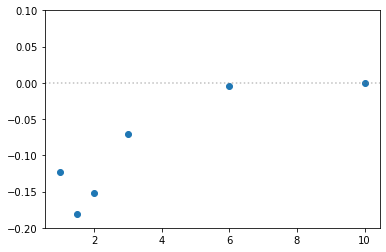

In [6]:
h_energy = part.E.Ea
plt.scatter(distances, energy - 2 * h_energy)
plt.axhline(y=0, alpha=0.5, c="grey", ls=":")
plt.ylim(-.2,.1)

(-0.2, 0.1)

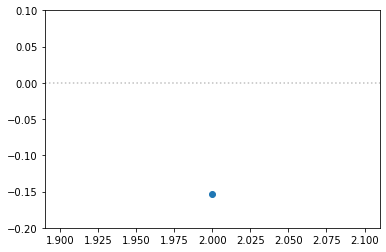

In [52]:
h_energy = part.E.Ea
plt.scatter(distances, energy - 2 * h_energy)
plt.axhline(y=0, alpha=0.5, c="grey", ls=":")
plt.ylim(-.2,.1)

In [46]:
vars(part.E)

{'Ea': -0.23844197926790334,
 'Eb': -0.23844197926790334,
 'Ef': -0.4768839585358067,
 'Tsf': 0.4620807664165111,
 'Eksf': array([[-0.37083057,  0.        ]]),
 'Enucf': -0.9586482079839713,
 'Exf': -0.25432479595589,
 'Ecf': -0.021606175193767806,
 'Ehf': 0.2956144541813114,
 'Vhxcf': 0.22731030705386193,
 'Ep': -0.10361407413796911,
 'Ep_pot': -0.10138801621614,
 'Ep_kin': -0.0009445526559095918,
 'Ep_hxc': -0.0012815052659195076,
 'Et': -0.5804980326737758,
 'Vnn': 0.1,
 'E': -0.4804980326737758,
 'evals_a': array([], dtype=float64),
 'evals_b': array([], dtype=float64),
 'S': 0.008408703562903047,
 'F': 0.018974622994724768,
 'Ehcor': 0.0,
 'Ep_h': -0.12210437561611617,
 'Ep_x': 0.05241116437900334,
 'Ep_c': 0.0021553599567060884}

In [53]:
vars(part.E)

{'Ea': -0.21261475257867704,
 'Eb': -0.21261475257867704,
 'Ef': -0.4252295051573541,
 'Tsf': 0.6419010917350978,
 'Eksf': array([[-0.79224759,  0.        ]]),
 'Enucf': -1.0955774472171382,
 'Exf': -0.30909758371853363,
 'Ecf': -0.023736227409023043,
 'Ehf': 0.361280661452243,
 'Vhxcf': 0.28330684675459084,
 'Ep': -0.654010068876065,
 'Ep_pot': -0.5689838591336773,
 'Ep_kin': -0.07871891905257977,
 'Ep_hxc': -0.006307290689807986,
 'Et': -1.079239574033419,
 'Vnn': 0.5,
 'E': -0.5792395740334191,
 'evals_a': array([], dtype=float64),
 'evals_b': array([], dtype=float64),
 'S': 0.3634945898331485,
 'F': 0.6961056555557593,
 'Ehcor': 0.0,
 'Ep_h': -0.03942103341034814,
 'Ep_x': 0.029481317179483935,
 'Ep_c': 0.000878892432826895}

In [54]:
vars(part.KSa.E)

{'E': -0.4252295051573541,
 'Ec': -0.023736227409023043,
 'Ex': -0.30909758371853363,
 'Eks': array([[-0.79224759,  0.        ]]),
 'Vks': array([[-1.43414868,  0.        ]]),
 'Ts': 0.6419010917350978,
 'evals': array([], dtype=float64),
 'Enuc': -1.0955774472171382,
 'Vext': -0.6218777797762454,
 'Vhxc': 0.28330684675459084,
 'Eh': 0.361280661452243,
 'Et': -0.4252295051573541,
 'Vnn': 0.0,
 'Ehcor': 0.0}